In [31]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# How to load all the files in a directory

In [38]:
files = glob.glob('../../../data/campus-2nd-round-processed/processed/search+youtube/*.csv')

# go through every files, for each file, load it as a dataframe and so some data aggregation/counting and plot

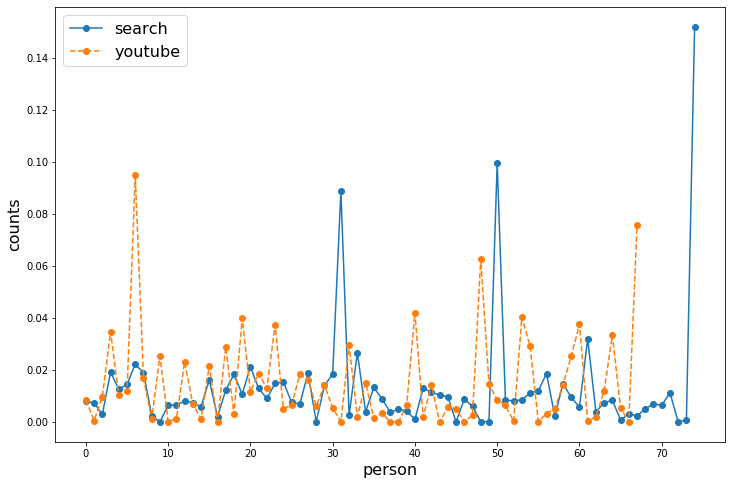

In [39]:
search_counts = []
youtube_counts = []
for f in files:
    df = pd.read_csv(f)
    v = df.source.value_counts()
    if 'search' in v:
        search_counts.append(v.search)

    if 'youtube' in v:
        youtube_counts.append(v.youtube)

youtube_counts = np.array(youtube_counts)/sum(youtube_counts)    
search_counts = np.array(search_counts)/sum(search_counts)    

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(search_counts)), search_counts,'o-', label='search')
ax.plot(range(len(youtube_counts)), youtube_counts, 'o--', label='youtube')
ax.set_xlabel('person',fontsize=16)
ax.set_ylabel('counts',fontsize=16)
plt.legend(fontsize=16)

# Go through each file and for every file, aggregate data by weeks and for each each do some statistic!

for f in files:
    df = pd.read_csv(f)      
    df['datetime']= pd.to_datetime(df['datetime'])
    
    weekly_gs = []
    weekly_utube = []
    weekly_total = []
    
    for week, wdf in df.set_index('datetime').groupby(pd.Grouper(freq='W')):
        if len(wdf) >0:
            week_label = str(week).split(' ')[0]
            #print(week_label, ' week has ', len(wdf), 'events')
    #print('==========END OF A PERSON ============')

# Example function to process UGLY Google category string
# for example if the category string is like this: "[['/Shopping/Apparel/Casual Apparel', 0.9300000071525574]]"
# this function will return "Shopping"

In [45]:
import ast
def get_cat_name(string):
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name

In [46]:
get_cat_name("[['/Shopping/Apparel/Casual Apparel', 0.9300000071525574]]")

'Shopping'